In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv("production-data.csv")
data.head(30)

,unsullen.id,production.date,report.date,produced,defects,supplier
0,1.0,1,1,103.0,0.0,harpy.co
1,1.0,1,2,0.0,2.0,harpy.co
2,1.0,1,3,0.0,4.0,harpy.co
3,1.0,1,4,0.0,5.0,harpy.co
4,1.0,1,5,0.0,13.0,harpy.co
5,1.0,1,6,0.0,11.0,harpy.co
6,1.0,1,7,0.0,11.0,harpy.co
7,1.0,2,2,105.0,0.0,harpy.co
8,1.0,2,3,0.0,2.0,harpy.co
9,1.0,2,4,0.0,2.0,harpy.co


In [49]:
supplier_creation = data.groupby(['supplier', 'production.date']);
produced_sum = supplier_creation['produced'].sum()
harpy_creation_produced = np.array(produced_sum['harpy.co'])
westeros_creation_produced = np.array(produced_sum['westeros.inc'])

supplier_defects = data.groupby(['supplier', 'report.date']);
defect_sum = supplier_defects['defects'].sum()
harpy_defects = np.array(defect_sum['harpy.co'])
westeros_defects = np.array(defect_sum['westeros.inc'])


supplier      production.date
harpy.co      1                  5248.0
              2                  5256.0
              3                  5243.0
              4                  5282.0
              5                  5243.0
              6                  5260.0
westeros.inc  1                  5280.0
              2                  5272.0
              3                  5298.0
              4                  5285.0
              5                  5263.0
              6                  5227.0
Name: produced, dtype: float64

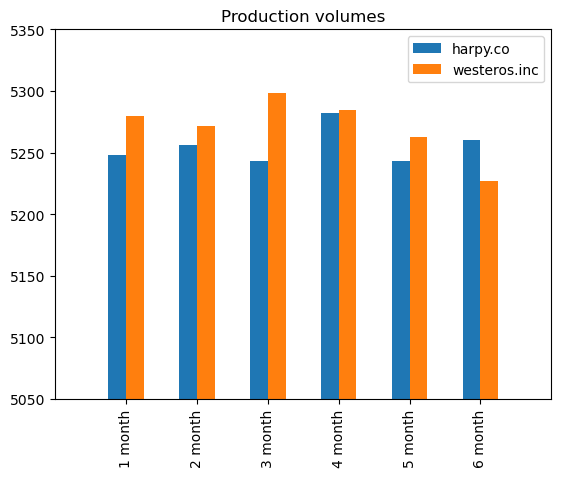

In [41]:
df_plot = pd.DataFrame(data=(np.array([harpy_creation_produced, westeros_creation_produced])).transpose())
df_plot.columns = ['harpy.co', 'westeros.inc']

xlab = [(str(i + 1) + ' month') for i in range(0, 6)]
plot = df_plot.plot(kind='bar')
plot.set_xticklabels(xlab)
plot.set_xlim([-1, len(xlab)])
plot.set_ylim([5050, 5350])

plt.title('Production volumes')
plt.show()

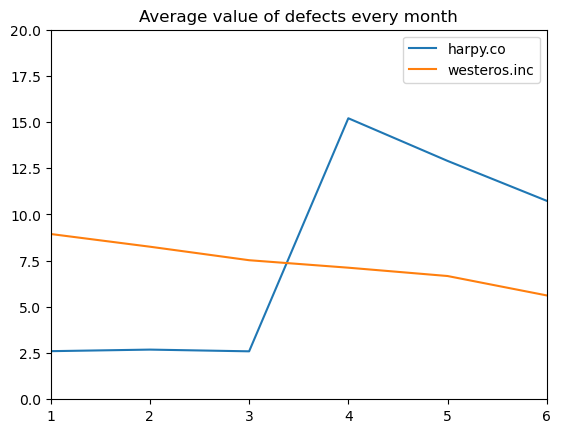

In [46]:
data['duration'] = data['report.date'] - data['production.date']
supplier_duration = data.groupby(['supplier', 'duration'])

# Добавляем значение duration для обозначения "срока годности" меча и анализируем, сколько он прослужит до поломки

duration_mean = supplier_duration['defects'].mean()
harpy_duration_defects = np.array(duration_mean['harpy.co'])
westeros_duration_defects = np.array(duration_mean['westeros.inc'])

dr_plot = pd.DataFrame(data=(np.array([harpy_duration_defects, westeros_duration_defects])).transpose())
dr_plot.columns = ['harpy.co', 'westeros.inc']

plot = dr_plot.plot(kind='line')
plot.set_xlim([1, len(xlab)])
plot.set_ylim([0, 20])
plt.title('Average value of defects every month')
plt.show()

In [50]:
total_supplier_data = data.groupby(['supplier'])
produced_total = total_supplier_data['produced'].sum()
defects_total = total_supplier_data['defects'].sum()

In [52]:
produced_total

supplier
harpy.co        31532.0
westeros.inc    31625.0
Name: produced, dtype: float64

In [53]:
defects_total

supplier
harpy.co        6080.0
westeros.inc    8268.0
Name: defects, dtype: float64